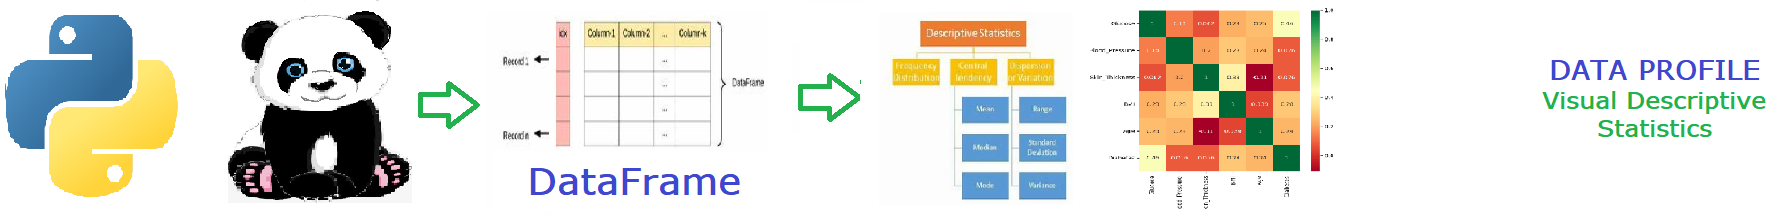

## Data Visualizer
##### Created Joe Eberle - 11/23/2022

In [1]:
import glob 
import rpa_excel as re
import pandas as pd #Pandas is high performance data manipulation 
import matplotlib.pyplot as plt   # matplot is for python graphics
import numpy as np   #numpy is for array processing
import seaborn  as sns
import plotly.express as px

## Optional Step 0 - Intitiate Configuration Settings and name the overall solution 

In [2]:
# Install any libraries you dont already have installed 
import configparser   
from datetime import date, datetime

# establish the configuration settings parser
config = configparser.ConfigParser()  
cfg = config.read('config.ini')   

# Establish some parameters 
solution_name = 'remote_process_automation_excel'

## Optional Step 0 - Intitiate the Logger

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_Start(solution_name, start_time) 

In [4]:
import pandas as pd 
# open the file for reading
# wbRD = xlrd.open_workbook("C://Data//Diabetes//diabetes.xlsx")
df_diabetes = pd.read_excel("C://Data//Diabetes//diabetes.xlsx")
print(f'The Diabetes data has {df_diabetes.shape[0]} rows and {df_diabetes.shape[1]} columns') 
df_diabetes.head(5)

The Diabetes data has 2000 rows and 9 columns


,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Diabetes_Diagnosis
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
df_diabetes.corr()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Diabetes_Diagnosis
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
Blood_Pressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
Skin_Thickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
Diabetes_Pedigree_Function,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Diabetes_Diagnosis,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


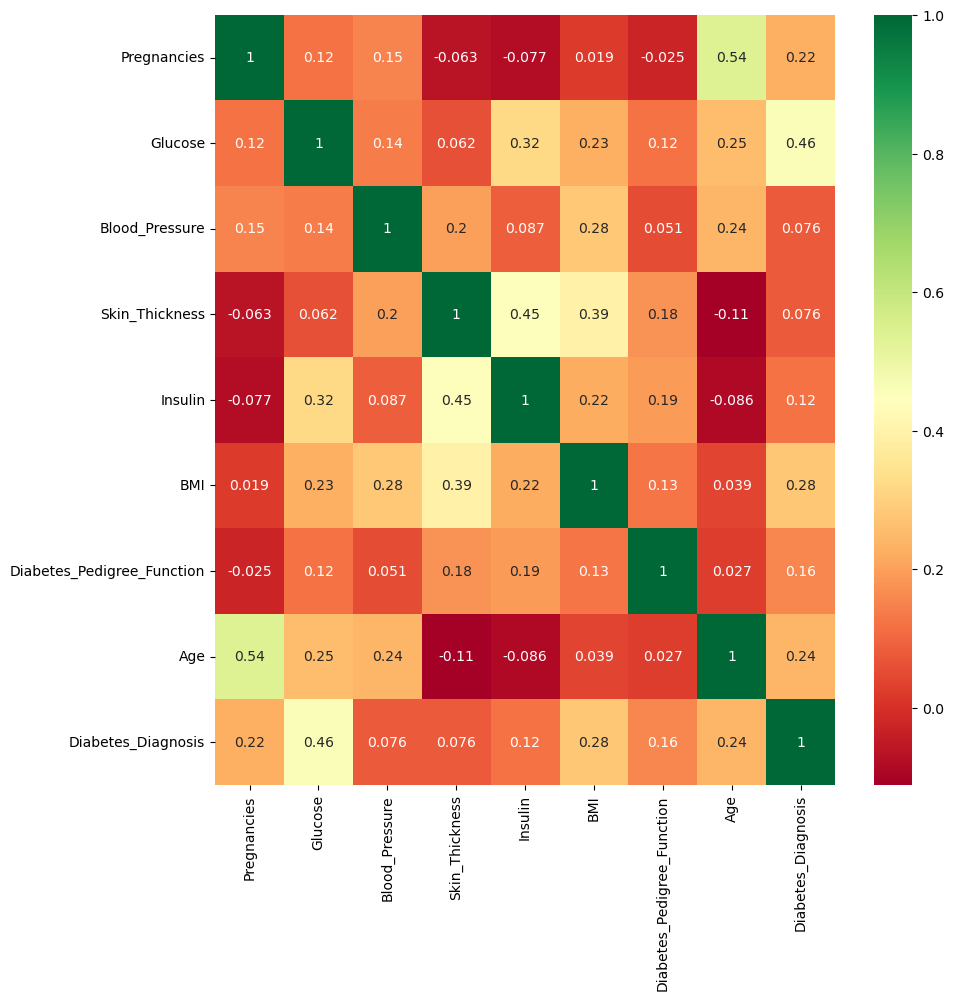

In [6]:
import pandas as pd #Pandas is high performance data manipulation 
import matplotlib.pyplot as plt   # matplot is for python graphics
import numpy as np   #numpy is for array processing
import seaborn  as sns
correlation_matrix = df_diabetes.corr()     #establish a correlation matrix for all fields
top_correlation_features = correlation_matrix.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df_diabetes[top_correlation_features].corr(),annot=True,cmap="RdYlGn")

## Step 1 -Format Entire Directory of Excel Files 

In [7]:
testing = True
if testing:
    formatted_excel_Files = re.format_excel_directory('J:\IT GLIN Data Services Shared\TempData')
    print(f'Formatted #{formatted_excel_Files} excel files') 

Found 0 excel files in directory:J:\IT GLIN Data Services Shared\TempData
Formatted #0 excel files


In [8]:
testing = True
if testing:
    formatted_excel_Files = re.format_excel_directory('C:\working_directory\excel')
    print(f'Formatted #{formatted_excel_Files} excel files') 

Found 28 excel files in directory:C:\working_directory\excel


AttributeError: 'NoneType' object has no attribute 'title'

In [9]:
# optional education - The following code will only run if educating is set to True for this solution
if config.get('global_infrastructure', 'documenting') == 'True':
    import os 
    import solution_documentation_rpa_excel as sd    # Establish the solutions documentation as sd 
    solution_documentation = sd.get_solution_documentation()  
    print(solution_documentation) 
    solution_document_file_name =  config.get('global_infrastructure', 'infrastructure_directory') + '/' + config.get('global_infrastructure', 'documentation_directory')+ '/documentation_' + solution_name + config.get('global_infrastructure', 'documentation_extension')
    sd.save_documentation(solution_document_file_name) 
    print('Solution Documention saved to file: {} '.format(solution_document_file_name))   
    
    
if config.get(solution_name, 'talking_code') == 'True': 
    import talking_code as tc  
    tc.say(solution_documentation)



This data science solution will enhance and improve your excel files automatically.
This helps give all your excel files the same look and feel.
You can easily modify the look and feel of your excel reports to make them your own.
This solution will help you document by adding meta tags to your existing excel.
This solution will help eliminate hours of manual formatting.



This data science solution was developed in collaboration with Joe Eberle.
The solution was developed in Python starting on 11/13/2022
This solution is free and open source and the code is openly available for general use.
The steps for this solution are:
Step 1: identify the directory to format excel files.
Step 2: run the remote process to format the excel files .
Step 3: optional test - Visually inspect a sample of  your modified excel files.

 
The additional notes for this solution are: 
Note 1: This solution makes and saves a formatted copy of your excel files.
Note 2: The copy of your excel will have the sam

In [10]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2023-04-18 18:02:04,058 - INFO - START remote_process_automation_excel =============================================
2023-04-18 18:02:04,058 - INFO - START remote_process_automation_excel Start Time = 2023-04-18 18:02:04
2023-04-18 18:02:04,058 - INFO - remote_process_automation_excel Step 0 - Initialize the configuration file parser
2023-04-18 18:02:04,852 - INFO - Found 0 excel files in directory:J:\IT GLIN Data Services Shared\TempData
2023-04-18 18:02:04,869 - INFO - Found 28 excel files in directory:C:\working_directory\excel
2023-04-18 18:11:51,181 - INFO - PERFORMANCE remote_process_automation_excel The total process duration was:587.12
2023-04-18 18:11:51,181 - INFO - PERFORMANCE remote_process_automation_excel Stop Time = 2023-04-18 18:11:51
2023-04-18 18:11:51,182 - INFO - PERFORMANCE remote_process_automation_excel Medium process duration greater than 3 minutes:587.12
2023-04-18 18:11:51,182 - INFO - PERFORMANCE remote_process_automation_excel Performance optimization is opt

In [ ]:
# Nutrition/Snacks
# Nutrition/Sweets
# Sugar Beverages 
# Anxiety/ Appetite
# Weight Control/Trying
# Weight Control/Program
# Anxiety Disorder
# Emotion Support
# Financial Stress – Food
# Financial Stress – Housing
